# Proyek Machine Learning (Recommedation System)
M. Ardifa Rizqi Ramadhan

# Import Library

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Data Understanding

In [37]:
url = "https://raw.githubusercontent.com/ardifa24/Machine-Learning-Terapan/refs/heads/main/Proyek-Recommendation-System/Coursera.csv"
courses = pd.read_csv(url)
courses.head()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


## Data Overview

In [38]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Course Name         3522 non-null   object
 1   University          3522 non-null   object
 2   Difficulty Level    3522 non-null   object
 3   Course Rating       3522 non-null   object
 4   Course URL          3522 non-null   object
 5   Course Description  3522 non-null   object
 6   Skills              3522 non-null   object
dtypes: object(7)
memory usage: 192.7+ KB


Berdasarkan informasi diatas menunjukan bahwa:
* dataset ini berisi 3522 baris dan 7 kolom
* seluruh data bertipe data object
(string atau teks)
* Tidak terdapat data kosong (null) di setiap kolom

## University Course Distribution

In [39]:
courses['University'].value_counts()

,count
University,
Coursera Project Network,562
University of Illinois at Urbana-Champaign,138
Johns Hopkins University,110
University of Colorado Boulder,101
University of Michigan,101
...,...
University of Nebraska,1
Pontificia Universidad Cat�lica de Chile,1
VMware,1


Dari hasil analisis, diketahui bahwa:

- **Coursera Project Network** menjadi penyedia kursus terbanyak dengan **562 kursus**.
- Universitas lain dengan kontribusi kursus yang signifikan antara lain:
  - **University of Illinois at Urbana-Champaign**: 138 kursus
  - **Johns Hopkins University**: 110 kursus
  - **University of Colorado Boulder**: 101 kursus
  - **University of Michigan**: 101 kursus
- Terdapat banyak universitas yang hanya menyediakan **1 kursus** di platform ini.

## Difficulty Level Distribution

                  Jumlah Sampel  Persentase (%)
Difficulty Level                               
Beginner                   1444            41.0
Advanced                   1005            28.5
Intermediate                837            23.8
Conversant                  186             5.3
Not Calibrated               50             1.4


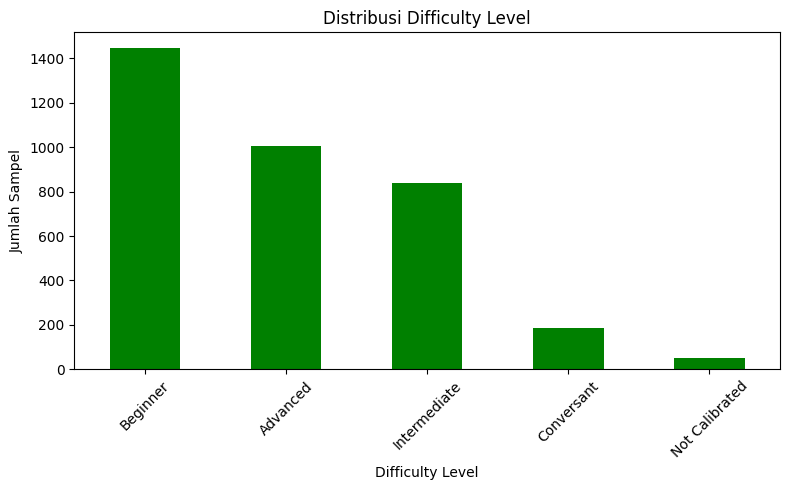

In [40]:
feature = 'Difficulty Level'

count = courses[feature].value_counts()
percent = 100 * courses['Difficulty Level'].value_counts(normalize=True)

df = pd.DataFrame({'Jumlah Sampel': count,'Persentase (%)': percent.round(1)})
print(df)

count.plot(kind='bar', title=f'Distribusi {feature}', ylabel='Jumlah Sampel', xlabel=feature, color='green', figsize=(8,5))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Mayoritas kursus ditujukan untuk pemula (Beginner) dengan 41% (1444 kursus), menunjukkan fokus platform pada pembelajaran tingkat dasar.

**menunjukkan target utamanya adalah pengguna yang baru memulai pembelajaran di bidang tertentu. Ini bisa menjadi pertimbangan penting bagi lembaga pendidikan yang ingin menyasar segmen pemula.**

# Data Preparation




## Handling Missing Value

In [41]:
courses.isnull().sum()

,0
Course Name,0
University,0
Difficulty Level,0
Course Rating,0
Course URL,0
Course Description,0
Skills,0


Tidak terdapat missing values pada ke-tujuh kolom (Course Name, University, Difficulty Level, Course Rating, Course URL, Course Description, dan Skills) dalam dataset.

## Feature Selection

In [42]:
course = courses[['Course Name','Course Description', 'Skills']]
course.head()

,Course Name,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


   Dilakukan pemilihan fitur (kolom) yang relevan untuk sistem rekomendasi, yaitu:  
   - Course Name  
   - Course Description
   - Skills  
   Ketiga kolom ini dipilih karena mengandung informasi deskriptif yang dapat merepresentasikan isi kursus.

## Column Renaming

In [43]:
course = course.rename(columns={'Course Name': 'Course_Name',
                                'Course Description': 'Course_Description',
                                'Skills': 'Skills'})
course.head()

,Course_Name,Course_Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


Nama kolom disesuaikan (diubah menjadi format snake_case) untuk memudahkan pemanggilan dan menjaga konsistensi penamaan variabel:  
   - 'Course Name' → 'Course_Name'  
   - 'Course Description' → 'Course_Description'  
   - 'Skills' tetap.

## TF-IDF Vectorizer

In [44]:
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data Course_Name
tf.fit(course['Course_Name'])

# Mapping array
tf.get_feature_names_out()

array(['000', '10', '101', ..., 'zap', 'zero', 'zoning'], dtype=object)

In [45]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(course['Course_Name'])

# Melihat ukutan matrix tf-idf
tfidf_matrix.shape

(3522, 3624)

In [46]:
# Mengonversi vektor tf-idf dalam bentuk matrix dengan fungsi todense().
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
# Membuat dataframe untuk melihat tf-idf matrix
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=course.Skills
).sample(10, axis=1).sample(10, axis=0)

,audiences,pollution,radio,usable,ideology,imputations,asia,oncology,box,empire
Skills,,,,,,,,,,
authority logic thought Critical Thinking numbers (spreadsheet) reason Strategy experience art speech personal-development personal-development,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Communication Computer Graphics Cancer Mathematics adobe indesign web relative change and difference c dynamic memory allocation Graphic Design project computer-science design-and-product,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
career college salary Planning relative change and difference personal advertisement rockbox experience interest laddering personal-development personal-development,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Leadership and Management LinkedIn mentorship personal advertisement Communication career leadership career development Planning career counseling personal-development personal-development,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
smart contract bitcoin network bitcoin Cryptography hashing cryptocurrency BlockChain ethereum proof-of-work system public-key cryptography computer-science software-development,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
logic puzzle mathematical induction Algorithms proof theory Permutations Problem Solving Discrete Mathematics Mathematics mathematical logic computer-science algorithms,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Data Visualization jpeg dict Python Programming Data Analysis web scraping analysis nest Computer Programming recursion computer-science software-development,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
display devices html web web page CSS Javascript project .properties Web Development hashing computer-science mobile-and-web-development,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
probability sampling statistics predictive modelling sampling techniques statistical classification oversampling project Machine Learning evaluation modeling data-science machine-learning,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model Development with Content Based Filtering

## Cosine Similarity

In [48]:
# Menghitung cosine similarity pad matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.15560396, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.14850231, 0.        ,
        0.0411767 ],
       [0.15560396, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.14850231, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.0411767 , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [49]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama course
cosine_sim_df = pd.DataFrame(cosine_sim, index=course['Course_Name'], columns=course['Course_Name'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap course
cosine_sim_df.sample(100, axis=1).sample(100, axis=0)

Shape: (3522, 3522)


Course_Name,English for Effective Business Writing,Emotion AI: Facial Key-points Detection,On Being a Scientist,User Experience: Research & Prototyping,Effectively delivering the news to your audience,Experimental Design Basics,Build Your Own iOS App,Managing Your Health: The Role of Physical Therapy and Exercise,"Programming Languages, Part C",Epigenetic Control of Gene Expression,...,Successful Negotiation: Essential Strategies and Skills,Introduction to Blockchain for Financial Services,Copyright for Educators & Librarians,Build Your First React Website (Part II),Marketing Management II,Grammar and Punctuation,The entrepreneur's guide for beginners,3D CAD Fundamental,Create a Boggle Word Solver using recursion in Python,"Concepts in Python: Loops, Functions and Returns"
Course_Name,,,,,,,,,,,,,,,,,,,,,
Image Classification with CNNs using Keras,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.065622,0.000000
Deploying Machine Learning Models,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
Creative Thinking: Techniques and Tools for Success,0.059240,0.0,0.0,0.0,0.000000,0.0,0.0,0.020031,0.0,0.000000,...,0.025098,0.057257,0.049279,0.0,0.0,0.033578,0.050197,0.0,0.000000,0.024092
Building Fintech Startups in Emerging Markets,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.034858,0.041670
Successful Presentation,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.328149,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Containerization Using Docker,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.079580,0.000000
Becoming a Sports Agent,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
Crafting Strategies for Innovation Initiatives for Corporate Entrepreneurs,0.094446,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.156731,0.091284,0.078566,0.0,0.0,0.000000,0.080030,0.0,0.000000,0.000000


## Function Recommendation

In [50]:
def course_recommendations(nama_course, similarity_data=cosine_sim_df, items=course[['Course_Name','Course_Description', 'Skills']], k=5):
    """
    Rekomendasi course berdasarkan kemiripan dengan course lainnya.

    Parameter:
    - nama_course : nama course (str)
    - similarity_data : DataFrame similarity (simetris)
    - items : DataFrame course dan metadatanya
    - k : jumlah rekomendasi (int)

    Output:
    - DataFrame course rekomendasi dengan metadata
    """
    if nama_course not in similarity_data.columns:
        return f"Course '{nama_course}' tidak ditemukan dalam data."

    closest = similarity_data[nama_course].sort_values(ascending=False).iloc[1:k+1].index

    closest = closest[closest != nama_course]

    return items[items['Course_Name'].isin(closest)].reset_index(drop=True)


In [51]:
course_recommendations('Predictive Analytics and Data Mining')

,Course_Name,Course_Description,Skills
0,Predictive Modeling and Analytics,Welcome to the second course in the Data Analy...,Logistic Regression analytics predictive ana...
1,Data Mining Project,Note: You should complete all the other course...,ordered pair tableau software Similarity Mea...
2,Design Thinking and Predictive Analytics for D...,This is the second course in the four-course s...,Logistic Regression supervised learning grad...
3,Text Mining and Analytics,This course will cover the major techniques fo...,probability Topic Model Natural Language Pro...
4,Population Health: Predictive Analytics,Predictive analytics has a longstanding tradit...,sample size determination prognostics extern...


# Evaluation

In [52]:
ground_truth = [
    'Predictive Modeling and Analytics',
    'Data Mining Project',
    'Design Thinking and Predictive Analytics for Data Products',
    'Population Health: Predictive Analytics',
    'Text Mining and Analytics'
]

rekomendasi = course_recommendations('Predictive Analytics and Data Mining')

precision = len(set(rekomendasi['Course_Name']) & set(ground_truth)) / len(rekomendasi)
print(f'Precision: {precision:.2f}')


Precision: 1.00
